#### regression1_linear      p.162

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# 讀入資料
train = np.loadtxt('click.csv', delimiter=',', skiprows=1)
print(train)

[[235. 591.]
 [216. 539.]
 [148. 413.]
 [ 35. 310.]
 [ 85. 308.]
 [204. 519.]
 [ 49. 325.]
 [ 25. 332.]
 [173. 498.]
 [191. 498.]
 [134. 392.]
 [ 99. 334.]
 [117. 385.]
 [112. 387.]
 [162. 425.]
 [272. 659.]
 [159. 400.]
 [159. 427.]
 [ 59. 319.]
 [198. 522.]]


In [3]:
train_x = train[:, 0]  # 第 0 行，取全部  -- x 軸


In [18]:
print(train_x)

[235. 216. 148.  35.  85. 204.  49.  25. 173. 191. 134.  99. 117. 112.
 162. 272. 159. 159.  59. 198.]


In [ ]:
train_y = train[:, 1]  # 第 1 行，取全部  -- y 軸

In [19]:
print(train_y)

[591. 539. 413. 310. 308. 519. 325. 332. 498. 498. 392. 334. 385. 387.
 425. 659. 400. 427. 319. 522.]


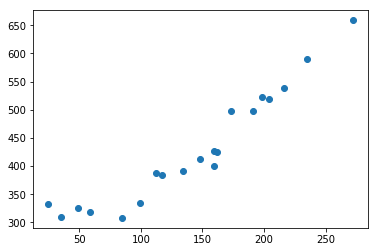

In [4]:
# 畫圖
plt.plot(train_x, train_y, 'o')
plt.show()

### 預測函數(p.30)： $$f_\theta(x) = \theta_0 + \theta_1x $$

###      $$ \theta_0：截距           \theta_1：斜率  $$

###  目標函數(p.33)： $$E(\theta) = \frac{1}{2}\sum_{i=1}^n{\left({y^{(i)} - f_\theta(x^{(i)}) }\right)}^2   $$

In [5]:
# 初始化參數
theta0 = np.random.rand()
theta1 = np.random.rand()

In [11]:
print(theta0)

429.0001580570531


In [12]:
print(theta1)

93.44646924494187


In [ ]:
# 預測函數
def f(x):
    return theta0 + theta1 * x

# 目標函數
def E(x, y):
    return 0.5 * np.sum((y - f(x)) ** 2)

### 標準化或 Z-score 正規化  $$ z^{(i)} = \frac{x^{(i)} - \mu}{\sigma} $$

In [17]:
# 標準化
mu = train_x.mean()    # 平均數
sigma = train_x.std()  # 標準差

In [14]:
print(mu)

141.6


In [15]:
print(sigma)

66.98537153737374


In [16]:
def standardize(x):
    return (x - mu) / sigma

train_z = standardize(train_x)
print(train_z)

[ 1.39433428  1.11069026  0.09554325 -1.59139223 -0.8449606   0.93154667
 -1.38239138 -1.74067856  0.46875906  0.73747445 -0.11345761 -0.63595975
 -0.36724436 -0.44188752  0.3045441   1.94669369  0.25975821  0.25975821
 -1.23310505  0.84197488]


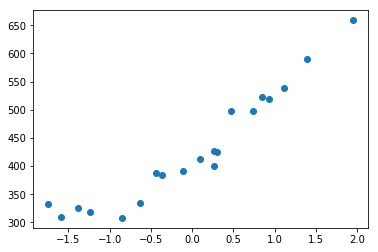

In [7]:
plt.plot(train_z, train_y, 'o')
plt.show()

# 標準化後，x 軸的刻度變小了

### $$ \theta_0 := \theta_0 - \eta\sum_{i=1}^n{\left(f_\theta(x^{(i)}) - {y^{(i)}}\right)}  $$

### $$ \theta_1 := \theta_1 - \eta\sum_{i=1}^n{\left(f_\theta(x^{(i)}) - {y^{(i)}}\right)}x^{(i)} $$

In [9]:
# 學習率，自己設
ETA = 1e-3

# 誤差的差分
diff = 1

# 更新次數
count = 0

# 重複參數的更新，直到誤差的差分變成 0.01 以下為止
error = E(train_z, train_y)
while diff > 1e-2:
    # 將更新結果儲存於臨時變數
    tmp_theta0 = theta0 - ETA * np.sum((f(train_z) - train_y))
    tmp_theta1 = theta1 - ETA * np.sum((f(train_z) - train_y) * train_z)
    
    # 更新參數
    theta0 = tmp_theta0
    theta1 = tmp_theta1
    
    # 計算與前一項誤差的差分
    current_error = E(train_z, train_y)
    diff = error - current_error
    error = current_error
    
    # 輸出日誌
    count += 1
    log = '{}次: theta0 = {:.3f}, theta1 = {:.3f}, 差分 = {:.4f}'
    print(log.format(count, theta0, theta1, diff))


1次: theta0 = 17.041, theta1 = 4.648, 差分 = 73280.7922
2次: theta0 = 25.284, theta1 = 6.425, 差分 = 70378.8728
3次: theta0 = 33.361, theta1 = 8.166, 差分 = 67591.8695
4次: theta0 = 41.277, theta1 = 9.872, 差分 = 64915.2314
5次: theta0 = 49.034, theta1 = 11.544, 差分 = 62344.5883
6次: theta0 = 56.636, theta1 = 13.183, 差分 = 59875.7426
7次: theta0 = 64.087, theta1 = 14.789, 差分 = 57504.6632
8次: theta0 = 71.388, theta1 = 16.363, 差分 = 55227.4785
9次: theta0 = 78.543, theta1 = 17.905, 差分 = 53040.4704
10次: theta0 = 85.555, theta1 = 19.416, 差分 = 50940.0677
11次: theta0 = 92.427, theta1 = 20.898, 差分 = 48922.8411
12次: theta0 = 99.162, theta1 = 22.349, 差分 = 46985.4966
13次: theta0 = 105.761, theta1 = 23.772, 差分 = 45124.8709
14次: theta0 = 112.229, theta1 = 25.166, 差分 = 43337.9260
15次: theta0 = 118.568, theta1 = 26.532, 差分 = 41621.7441
16次: theta0 = 124.779, theta1 = 27.871, 差分 = 39973.5231
17次: theta0 = 130.867, theta1 = 29.183, 差分 = 38390.5716
18次: theta0 = 136.832, theta1 = 30.469, 差分 = 36870.3049
19次: theta0 = 142

In [20]:
# 繪圖來確認
x = np.linspace(-3, 3, 100)
print(x)

[-3.         -2.93939394 -2.87878788 -2.81818182 -2.75757576 -2.6969697
 -2.63636364 -2.57575758 -2.51515152 -2.45454545 -2.39393939 -2.33333333
 -2.27272727 -2.21212121 -2.15151515 -2.09090909 -2.03030303 -1.96969697
 -1.90909091 -1.84848485 -1.78787879 -1.72727273 -1.66666667 -1.60606061
 -1.54545455 -1.48484848 -1.42424242 -1.36363636 -1.3030303  -1.24242424
 -1.18181818 -1.12121212 -1.06060606 -1.         -0.93939394 -0.87878788
 -0.81818182 -0.75757576 -0.6969697  -0.63636364 -0.57575758 -0.51515152
 -0.45454545 -0.39393939 -0.33333333 -0.27272727 -0.21212121 -0.15151515
 -0.09090909 -0.03030303  0.03030303  0.09090909  0.15151515  0.21212121
  0.27272727  0.33333333  0.39393939  0.45454545  0.51515152  0.57575758
  0.63636364  0.6969697   0.75757576  0.81818182  0.87878788  0.93939394
  1.          1.06060606  1.12121212  1.18181818  1.24242424  1.3030303
  1.36363636  1.42424242  1.48484848  1.54545455  1.60606061  1.66666667
  1.72727273  1.78787879  1.84848485  1.90909091  1.9

In [22]:
print(f(x))   # f(x) = theta0 + theta1 * x

[148.66075032 154.3241727  159.98759508 165.65101746 171.31443984
 176.97786221 182.64128459 188.30470697 193.96812935 199.63155173
 205.29497411 210.95839649 216.62181886 222.28524124 227.94866362
 233.612086   239.27550838 244.93893076 250.60235313 256.26577551
 261.92919789 267.59262027 273.25604265 278.91946503 284.58288741
 290.24630978 295.90973216 301.57315454 307.23657692 312.8999993
 318.56342168 324.22684406 329.89026643 335.55368881 341.21711119
 346.88053357 352.54395595 358.20737833 363.8708007  369.53422308
 375.19764546 380.86106784 386.52449022 392.1879126  397.85133498
 403.51475735 409.17817973 414.84160211 420.50502449 426.16844687
 431.83186925 437.49529162 443.158714   448.82213638 454.48555876
 460.14898114 465.81240352 471.4758259  477.13924827 482.80267065
 488.46609303 494.12951541 499.79293779 505.45636017 511.11978255
 516.78320492 522.4466273  528.11004968 533.77347206 539.43689444
 545.10031682 550.76373919 556.42716157 562.09058395 567.75400633
 573.417428

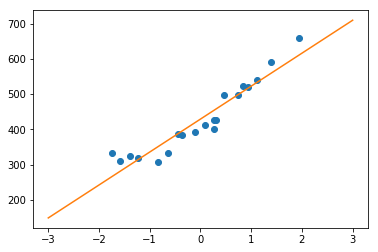

In [21]:
plt.plot(train_z, train_y, 'o')  # 點 
plt.plot(x, f(x))  # 直線
plt.show()

In [23]:
f(standardize(100))

370.9669930335425

In [25]:
f(standardize(200))

510.4697935708276

In [26]:
f(standardize(300))

649.9725941081128

### 多項式迴歸的程式    p.165

In [27]:
# 初始化參數
theta = np.random.rand(3)
print(theta)

[0.50409512 0.82352669 0.26609042]


In [30]:
# 建立學習資料的矩陣
def to_matrix(x):
    return np.vstack([np.ones(x.shape[0]), x, x ** 2]).T

X = to_matrix(train_z)
print(X)

[[ 1.          1.39433428  1.94416809]
 [ 1.          1.11069026  1.23363286]
 [ 1.          0.09554325  0.00912851]
 [ 1.         -1.59139223  2.53252924]
 [ 1.         -0.8449606   0.71395842]
 [ 1.          0.93154667  0.8677792 ]
 [ 1.         -1.38239138  1.91100592]
 [ 1.         -1.74067856  3.02996185]
 [ 1.          0.46875906  0.21973506]
 [ 1.          0.73747445  0.54386856]
 [ 1.         -0.11345761  0.01287263]
 [ 1.         -0.63595975  0.4044448 ]
 [ 1.         -0.36724436  0.13486842]
 [ 1.         -0.44188752  0.19526458]
 [ 1.          0.3045441   0.09274711]
 [ 1.          1.94669369  3.78961632]
 [ 1.          0.25975821  0.06747433]
 [ 1.          0.25975821  0.06747433]
 [ 1.         -1.23310505  1.52054807]
 [ 1.          0.84197488  0.70892169]]


In [31]:
# 預測函數
def f(x):
    return np.dot(x, theta)